In [4]:
import auxiliary
import models
import numpy as np
from maneuvers import Maneuvers
import ipyvolume as ipv
%config InlineBackend.figure_format = 'retina'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Semi-major axis (a)
$\alpha = \arctan\bigg(\frac{e\sin(\nu)}{1+e\cos(\nu)}\bigg)$  
$\beta = 0$
<img src="./figs/aAngles.svg?sanitize=true"/>

Propagating...from day  0.0  to  1.0
Propagating...from day  1.0  to  11.0
Propagating...from day  11.0  to  12.0


Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

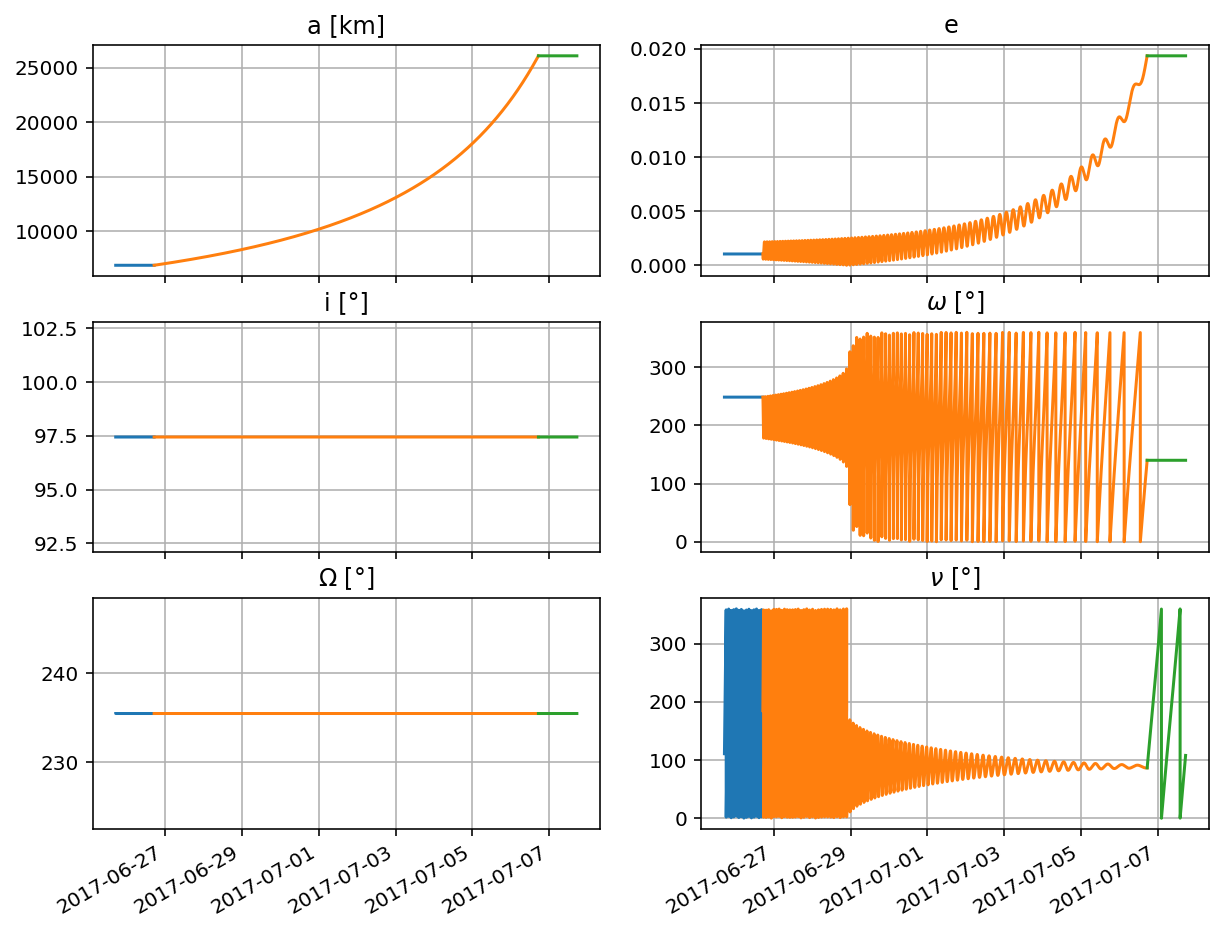

In [23]:
coe,date = auxiliary.parseTle("suchai0.tle")
#----- SPACECRAFT DEFINITIONS -----
satellite = models.Spacecraft(3,1,10)
satellite.thruster = models.Thruster(thrust=10e-3,isp=720)
# ---- MANEUVERING ------
def alphaCallback(coe):
    e = coe[1]
    nu = coe[5]
    alpha = np.arctan2(e*np.sin(nu),1+e*np.cos(nu))
    return alpha
def betaCallback(coe):
    return 0

maneuver = Maneuvers(coe,satellite,date)
maneuver.propagate(60*60*24,60)
maneuver.addPerturbation("thrust")
maneuver.thrustProfile = (alphaCallback,betaCallback)
maneuver.propagate(60*60*24*10,60)
maneuver.removePerturbation("thrust")
maneuver.propagate(60*60*24,60)
maneuver.plot("coe");
display(maneuver.ipvPlot3D())
ipv.xyzlim(20e3)
#maneuver.plot("3d-trajectory");

## Eccentricity (e)
$\alpha = \arctan\bigg(\frac{\sin(\nu)}{\cos(\nu)+\cos(E)}\bigg)$  
$\beta = 0$
<img src="./figs/eAngles.svg?sanitize=true"/>

Propagating...from day  0.0  to  1.0
Propagating...from day  1.0  to  2.0
Propagating...from day  2.0  to  3.0


Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

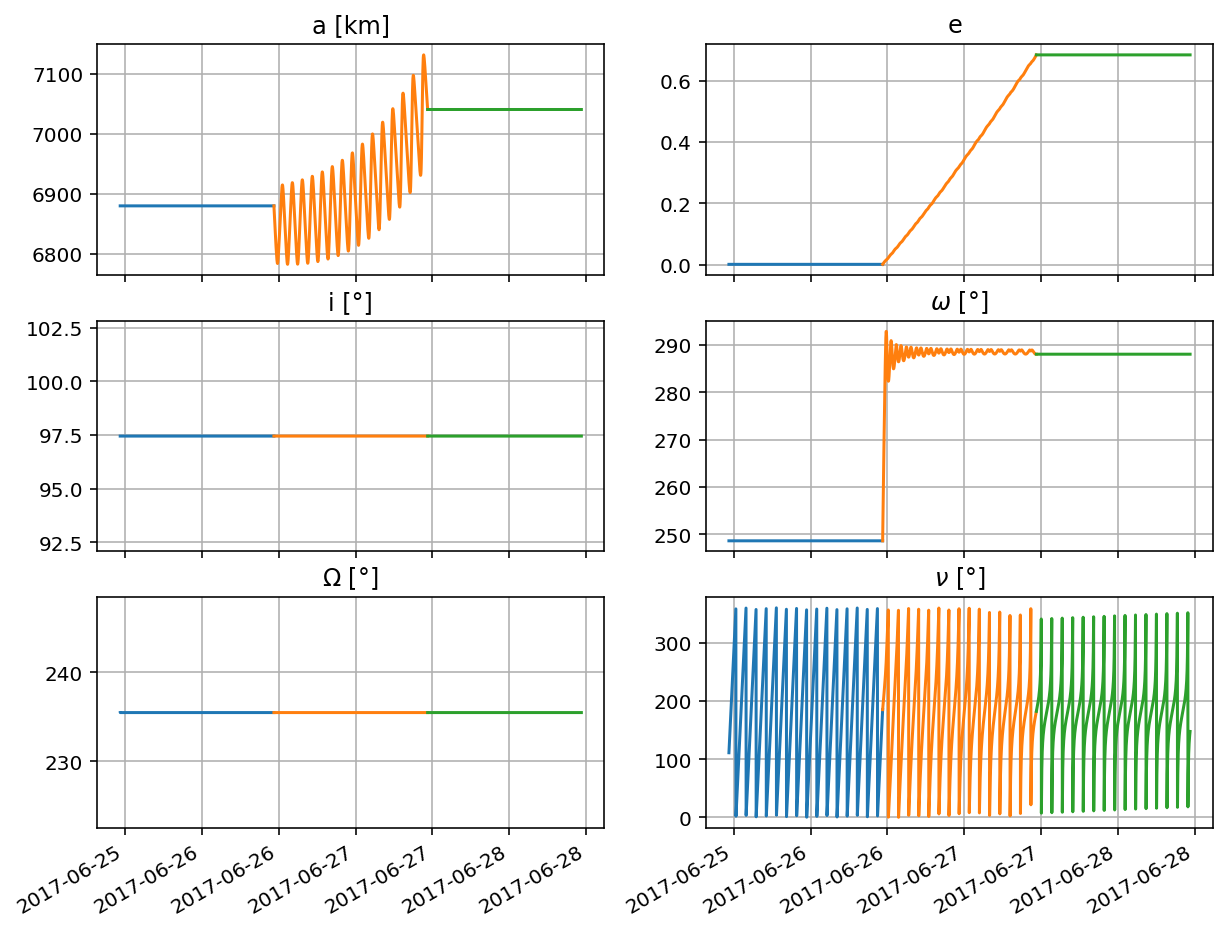

In [25]:
#----- SPACECRAFT DEFINITIONS -----
satellite = models.Spacecraft(3,1,10)
satellite.thruster = models.Thruster(thrust=100e-3,isp=720)
# ---- MANEUVERING ------
def alphaCallback(coe):
    e = coe[1]
    nu = coe[5]
    E = 2*np.arctan2(np.tan(nu/2),np.sqrt((1+e)/(1-e)))

    alpha = np.arctan2(np.sin(nu),np.cos(nu)+np.cos(E))
    return alpha
def betaCallback(coe):
    return 0

maneuver = Maneuvers(coe,satellite,date)
maneuver.propagate(60*60*24,60)
maneuver.addPerturbation("thrust")
maneuver.thrustProfile = (alphaCallback,betaCallback)
maneuver.propagate(60*60*24,60)
maneuver.removePerturbation("thrust")
maneuver.propagate(60*60*24,60)
maneuver.plot("coe");
display(maneuver.ipvPlot3D())
ipv.xyzlim(10e3)
#maneuver.plot("3d-trajectory");

## Inclination (i)
$\alpha = 0$  
$\beta = sgn(\cos(\omega+\nu))\cdot\frac{\pi}{2}$
<img src="./figs/iAngles.svg?sanitize=true"/>

Propagating...from day  0.0  to  1.0
Propagating...from day  1.0  to  2.0
Propagating...from day  2.0  to  3.0


Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

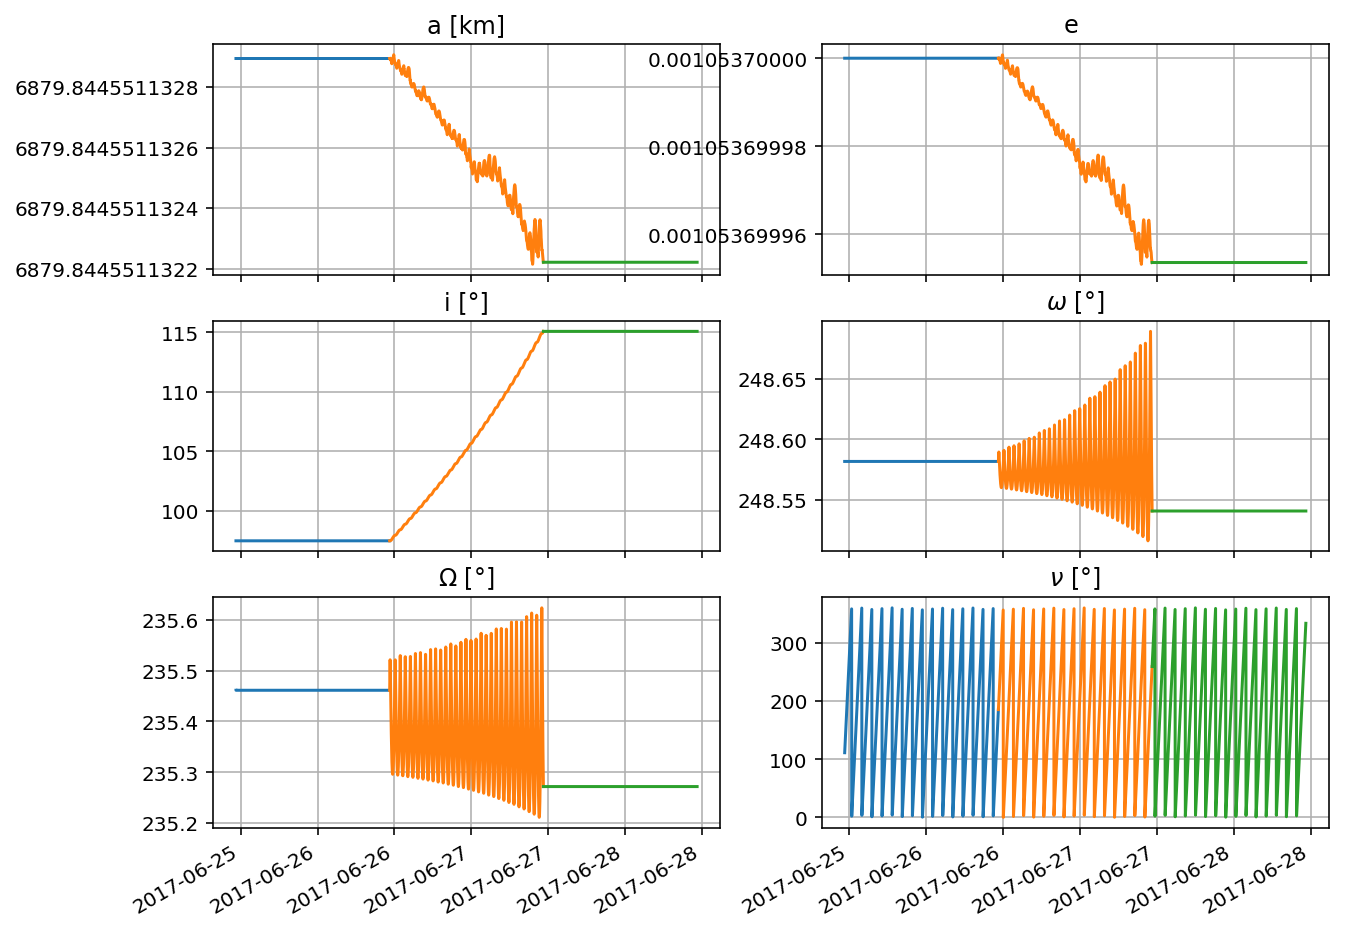

In [26]:
# ---- MANEUVERING ------
def alphaCallback(coe):
    return 0
def betaCallback(coe):
    omega = coe[3]
    nu = coe[5]
    beta = np.sign(np.cos(omega+nu))*np.pi/2
    return beta

maneuver = Maneuvers(coe,satellite,date)
maneuver.propagate(60*60*24,60)
maneuver.addPerturbation("thrust")
maneuver.thrustProfile = (alphaCallback,betaCallback)
maneuver.propagate(60*60*24,60)
maneuver.removePerturbation("thrust")
maneuver.propagate(60*60*24,60)
maneuver.plot("coe");
display(maneuver.ipvPlot3D())
ipv.xyzlim(10e3)
#maneuver.plot("3d-trajectory");

## RAAN ($\Omega$)
$\alpha = 0$  
$\beta = sgn(sin(\omega+\nu))\cdot\frac{\pi}{2}$
<img src="./figs/RAANAngles.svg?sanitize=true"/>

Propagating...from day  0.0  to  1.0
Propagating...from day  1.0  to  2.0
Propagating...from day  2.0  to  3.0


Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

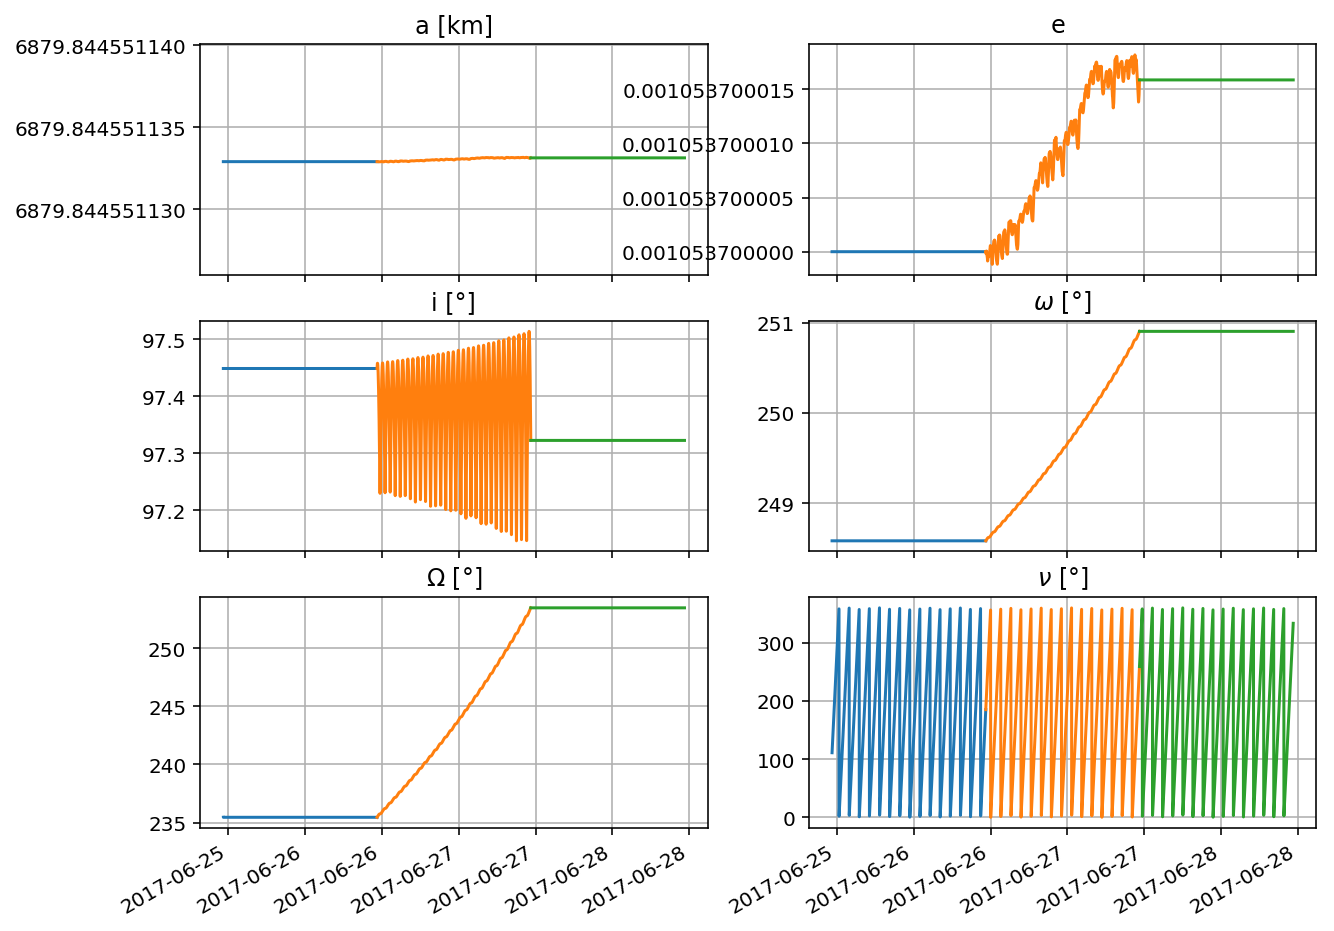

In [20]:
# ---- MANEUVERING ------
def alphaCallback(coe):
    return 0
def betaCallback(coe):
    omega = coe[3]
    nu = coe[5]
    beta = np.sign(np.sin(omega+nu))*np.pi/2
    return beta

maneuver = Maneuvers(coe,satellite,date)
maneuver.propagate(60*60*24,60)
maneuver.addPerturbation("thrust")
maneuver.thrustProfile = (alphaCallback,betaCallback)
maneuver.propagate(60*60*24,60)
maneuver.removePerturbation("thrust")
maneuver.propagate(60*60*24,60)
maneuver.plot("coe");
#maneuver.plot("3d-trajectory");
display(maneuver.ipvPlot3D())
ipv.xyzlim(10e3)

## Argument of Perigee ($\omega$)
$\alpha = \arctan\bigg(\frac{1+e\cos(\nu)}{2+e\cos(\nu)}\tan({\nu})^{-1}\bigg)$  
$\beta = \arctan\bigg(\frac{e\tan(i)^{-1}\sin(\omega+\nu)}{\sin(\alpha-\nu)(1+e\cos(\nu)-\cos(\alpha)\sin(\nu)}\bigg)$
<img src="./figs/omegaAngles.svg?sanitize=true"/>

Propagating...from day  0.0  to  1.0
Propagating...from day  1.0  to  2.0
Propagating...from day  2.0  to  3.0


Figure(camera=PerspectiveCamera(fov=46.0, position=(0.0, 0.0, 2.0), quaternion=(0.0, 0.0, 0.0, 1.0), scale=(1.…

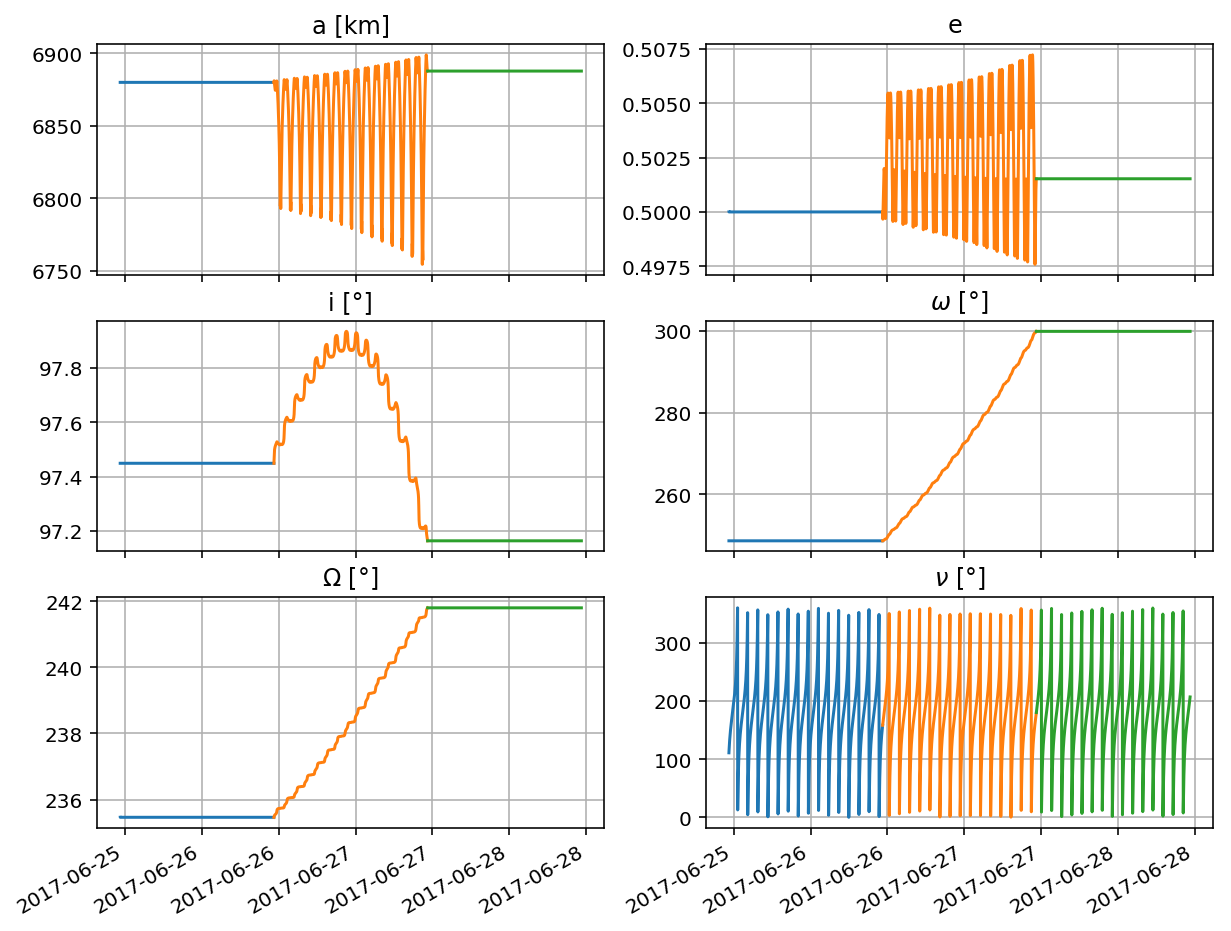

In [21]:
coe,date = auxiliary.parseTle("suchai0.tle")
coe[1] = 0.5
#----- SPACECRAFT DEFINITIONS -----
satellite = models.Spacecraft(3,1,10)
satellite.thruster = models.Thruster(thrust=100e-3,isp=720)

# ---- MANEUVERING ------
def alphaCallback(coe):
    e = coe[1]
    nu = coe[5]
    alpha = np.arctan2((1+e*np.cos(nu)),(2+e*np.cos(nu))*np.tan(nu))
    return alpha
def betaCallback(coe):
    alpha = alphaCallback(coe)
    e = coe[1]
    i = coe[2]
    omega = coe[3]
    nu = coe[5]
    beta = np.arctan2(e*np.sin(omega+nu),np.tan(i)*(np.sin(alpha-nu)*(1+e*np.cos(nu))-np.cos(alpha)*np.sin(nu)))
    return beta

maneuver = Maneuvers(coe,satellite,date)
maneuver.propagate(60*60*24,60)
maneuver.addPerturbation("thrust")
maneuver.thrustProfile = (alphaCallback,betaCallback)
maneuver.propagate(60*60*24,60)
maneuver.removePerturbation("thrust")
maneuver.propagate(60*60*24,60)
maneuver.plot("coe");
display(maneuver.ipvPlot3D())
ipv.xyzlim(10e3)
#maneuver.plot("3d-trajectory");

In [20]:
%matplotlib notebook
%matplotlib notebook
%matplotlib inline

In [24]:
a = np.array([1,2,3])
print(a[0:2])

[1 2]


In [4]:
from platform import python_version
print(python_version())

import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

3.6.6
C:\Users\MrPapasFritas\Miniconda3\python.exe
3.6.6 | packaged by conda-forge | (default, Jul 26 2018, 11:48:23) [MSC v.1900 64 bit (AMD64)]
sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)
